In [110]:
# import dataset & analytic libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import data-splitter
from sklearn.model_selection import train_test_split

# import vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# import estimator
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# import report and analyze libs
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

# import pipeline for deployment lib
from sklearn.pipeline import Pipeline

# import export model lib
import joblib

In [45]:
# dataset initialization

df = pd.read_csv('spam_ham_dataset.csv')

df.info()

count_ham = df[df['label'] == 'ham'].count()
count_spam = df[df['label'] == 'spam'].count()

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [46]:
count_ham

Unnamed: 0    3672
label         3672
text          3672
label_num     3672
dtype: int64

In [47]:
count_spam

Unnamed: 0    1499
label         1499
text          1499
label_num     1499
dtype: int64

<Axes: xlabel='label', ylabel='count'>

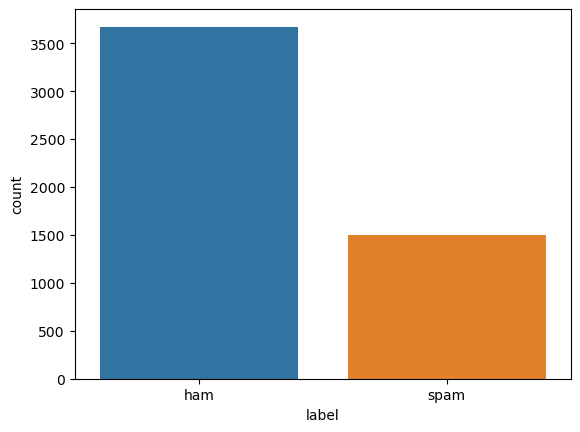

In [48]:
# visualizing data

sns.countplot(data=df, x= 'label')

In [49]:
# data training preparation

X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [50]:
# vectorization (convert words to numbers)

tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(X_train)

X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [51]:
X_train_tfidf

<4136x44934 sparse matrix of type '<class 'numpy.float64'>'
	with 272247 stored elements in Compressed Sparse Row format>

In [52]:
X_test_tfidf

<1035x44934 sparse matrix of type '<class 'numpy.float64'>'
	with 60611 stored elements in Compressed Sparse Row format>

In [53]:
# model / estimator initialization

model_nb = MultinomialNB()
model_svc = LinearSVC(dual='auto')

In [54]:
model_nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [55]:
model_svc.fit(X_train_tfidf, y_train)

LinearSVC(dual='auto')

In [59]:
# predict & analyze result

# https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
# https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report

def report(model):
    preds = model.predict(X_test_tfidf)
    cm = confusion_matrix(y_test, preds, labels= model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    print(classification_report(y_test,preds))
    
    disp.plot()
    plt.show()

              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       742
        spam       1.00      0.73      0.84       293

    accuracy                           0.92      1035
   macro avg       0.95      0.87      0.90      1035
weighted avg       0.93      0.92      0.92      1035



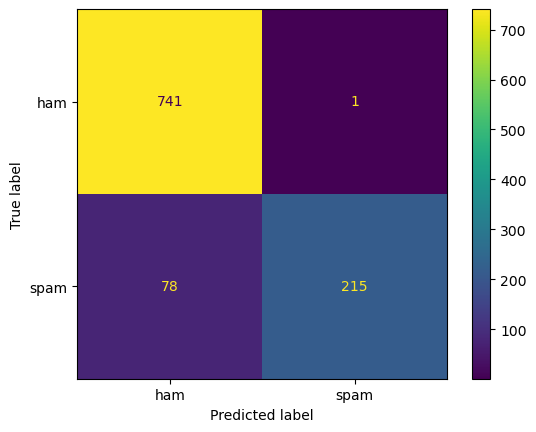

In [57]:
report(model_nb)

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       742
        spam       0.98      0.99      0.98       293

    accuracy                           0.99      1035
   macro avg       0.99      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035



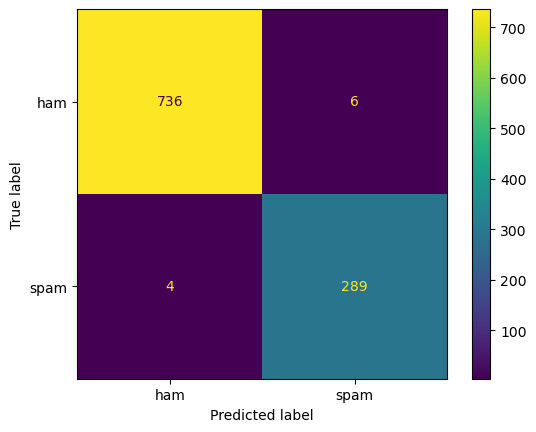

In [60]:
report(model_svc)

In [64]:
# deployment preparation

pipe = Pipeline([('tfidf', TfidfVectorizer()), ('svc', LinearSVC(dual='auto'))])

pipe.fit(X, y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC(dual='auto'))])

In [101]:
# test the prediction

pipe.predict(['get high paying job from home'])

array(['spam'], dtype=object)

In [102]:
pipe.predict(['get free ebook today to increase your salary'])

array(['spam'], dtype=object)

In [103]:
pipe.predict(['ok, i will call you later'])

array(['ham'], dtype=object)

In [104]:
pipe.predict(["we will have a meeting later"])

array(['ham'], dtype=object)

In [105]:
pipe.predict(["don't forget we will have meeting later"])

array(['ham'], dtype=object)

In [107]:
pipe.predict(["Hi Firman, For a limited time, we will migrate your existing FAQ content into a Gorgias Help Center for free."])

array(['spam'], dtype=object)

In [108]:
pipe.predict(["Thank you for your support and dedication for the last 4 years to the compay."])

array(['ham'], dtype=object)

In [111]:
# save the model

joblib.dump(pipe, 'spam_classifier.pkl')

['spam_classifier.pkl']

In [114]:
# load the model

loaded_model = joblib.load('spam_classifier.pkl')

loaded_model.predict(['Hey, I have a tips for you to get a high paying job from your home!'])

array(['spam'], dtype=object)